# 목표
- 타이타닉 데이터를 학습해서 생존자/사망자를 예측해보자
- 머신러닝의 전체 과정을 진행해보자.

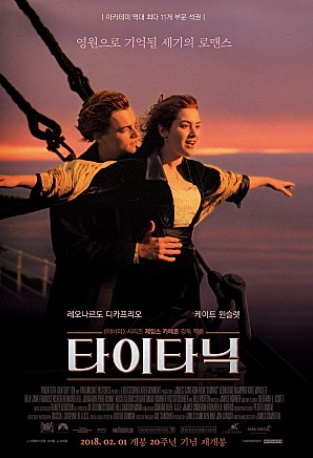

In [2]:
# 이미지를 넣는 라이브러리
from IPython.display import Image
Image('https://www.gukjenews.com/news/photo/201912/1212183_991659_1921.jpg')

![타이타닉](https://www.gukjenews.com/news/photo/201912/1212183_991659_1921.jpg)

![타이타닉호 내부](https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg)

# 머신러닝 과정
1. 문제정의
2. 데이터 수집
3. 데이터 전처리
4. 탐색적 데이터 분석(EDA)
5. 모델 선택 및 학습
6. 모델 평가

### 1. 문제정의
- 생존자/사망자를 예측
- Kaggle 경진대회에서 높은 순위를 차지
- 데이터를 토대로 생존율이 높은 승객, 생존율이 낮은 승객은 누구인지 판단

### 2. 데이터 수집
- Kaggle 사이트로부터 train,test 다운로드

- 타이타닉  train 데이터와 test데이터를 각각 변수 train, test에 저장하기
<br>(단, 인덱스는 PassengerId를 사용할 것)

In [3]:
import pandas as pd

train = pd.read_csv('train.csv',index_col = 'PassengerId')
test = pd.read_csv('test.csv',index_col = 'PassengerId')

#### 데이터 조회하기

In [4]:
# head() : 최상단 데이터 확인하는 메서드
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# tail() : 최하단 데이터를 확인하는 메서드
train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


##### 컬럼 (column) 설명

|컬럼|설명|비고|
|:---:|:-----------:|:-----------:|
|PassengerId|탑승객ID||
|Survived|생존여부|0 = 사망, 1 = 생존|
|Pclass|티켓 클래스|1, 2, 3|
|Name|이름||
|Sex|성별||
|Age|나이||
|SibSp|동반한 Sibling(형제자매)와 Spouse(배우자)의 수||
|Parch|동반한 Parent(부모) Child(자식)의 수||
|Ticket|티켓의 고유넘버||
|Fare|티켓의 요금||
|Cabin|객실 번호||
|Embarked|승선한 항|C = Cherbourg,Q = Queenstown,S = Southampton|

In [6]:
# 데이터의 크기 확인하기
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


In [7]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

##### 연습문제1
- Embarked는 승객의 탑승 항구를 나타내는 컬럼, 탑승 항구별 승격 데이터 분포 확인

In [9]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

##### 연습문제2
- 나이가 20살이상 40살 미만인 승객
- Pclass가 1등급 혹은 2등급인 승객
- 열(Column)은 Survived,Pclass,Age,Fare만 나오게 출력
- 상위 10개의 데이터만 출력

In [10]:
condition1 = (train['Age']>=20) & (train['Age']<40)
condition2 = (train['Pclass']<3)
train.loc[condition1&condition2 , ['Survived','Pclass','Age','Fare']].head(10)

,Survived,Pclass,Age,Fare
PassengerId,,,,
2,1,1,38.0,71.2833
4,1,1,35.0,53.1000
21,0,2,35.0,26.0000
22,1,2,34.0,13.0000
24,1,1,28.0,35.5000
35,0,1,28.0,82.1708
42,0,2,27.0,21.0000
54,1,2,29.0,26.0000
57,1,2,21.0,10.5000


##### 연습문제3
- 나이가 30살 이상 남자 승객
- Fare를 많이 낸 순서로 내림차순 정렬
- 상위 5개를 출력

In [11]:
condition1 = train['Age']>=30
condition2 = train['Sex']=='male'
condition=condition1&condition2
condition

PassengerId
1      False
2      False
3      False
4      False
5       True
       ...  
887    False
888    False
889    False
890    False
891     True
Length: 891, dtype: bool

In [12]:
train[condition].sort_values(by='Fare',ascending=False).head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S
391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S
660,0,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.2750,D48,C
699,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
545,0,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.4250,C86,C


### 3. 데이터 전처리 및 데이터 탐색

### 데이터 전처리

In [13]:
# 데이터의 갯수, 데이터 타입을 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [14]:
# 타입 변환
# astype()
# Pcalss의 타입 int64 -> int32로 변환
# 메모리 공간을 아낄 수 있음

train['Pclass'] = train['Pclass'].astype('int32')
train['Survived'] = train['Survived'].astype('int32')
train['SibSp'] = train['SibSp'].astype('int32')
train['Parch'] = train['Parch'].astype('int32')

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int32  
 1   Pclass    891 non-null    int32  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int32  
 6   Parch     891 non-null    int32  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int32(4), object(5)
memory usage: 69.6+ KB


In [16]:
# 각 컬럼에 대한 기술통계 확인
# describe() : 수치형 컬럼의 통계를 기본으로 한다.
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# 범주형 데이터 기술통계 확인
train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [18]:
# 남성과 여성의 데이터 수를 확인
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

#### 결측치
- 결측치는 비어있는 데이터를 의미
1. 결측치 데이터 확인
2. 결측치 아닌 데이터 확인
3. 결측 데이터 채우기
4. 결측 데이터 제거하기 - 컬럼 삭제

#### 1. 결측치 확인

In [19]:
# 1. 결측치 확인  isnull(), isna()
# 컬럼별 결측치의 개수를 확인하기 위해서는 sum()함수를 붙여주면 된다!
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [20]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### 1. Age 결측치 채우기
- 다른 컬럼간의 상관관계를 이용해 결측치를 채워보자,
- Age와 다른 컬럼간의 상관관계를 알아보자.

In [21]:
# 경고메시지 무시하기
import warnings
warnings.filterwarnings(action='ignore')

In [22]:
# corr() 메서드 : 각 컬럼간의 상관관계를 반환하는 메서드
# 경고 메시지 : 인덱스 번호 안맞거나, 지금은 사용가능하지만 버전 달라지면 지원안될 수 있다는 경고 - corr()는 후자
#-1(음의 상관관계 높음)~~~0(상관성 낮음)~~~~~+1(양의 상관관계 높음)
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- Pclass가 생존에 가장 높은 상관관계를 갖는다.
- 생존에 관련이 많을 것 같은 성별을 그룹핑에 활용해보자.

In [23]:
# 피봇테이블 : 그룹핑할 때 사용
pt1 = train.pivot_table(values='Age', # 데이터로 사용할 열
                  index=['Pclass','Sex'], # 행 위치에 들어갈 열(두 개 이상의 인덱스를 설정 가능)
                  aggfunc='mean') # 데이터 집계함수(이상치가 적거나 없으면 평균, 많으면 중앙값)
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [24]:
# Pclass가 1이고 여성인 사람의 평균 나이
pt1.loc[1,'female']

Age    34.611765
Name: (1, female), dtype: float64

In [25]:
# Pclass가 3인 남성의 평균나이
pt1.loc[3,'male']

Age    26.507589
Name: (3, male), dtype: float64

In [26]:
import numpy as np

In [27]:
train.iloc[888]['Age']

nan

In [28]:
train.iloc[888]['Pclass']

3

In [29]:
train.iloc[888]['Sex']

'female'

In [30]:
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [31]:
# 나이가 결측치인 경우 값을 담아주는 함수 정의
def fill_age(row):
    # 만약 나이가 결측치라면 피봇테이블에서 값을 리턴
    if np.isnan(row['Age'])==True:
        return pt1.loc[row['Pclass'],row['Sex']]
    # 만약 나이가 결측치가 아니라면 원래 나이값을 리턴
    else:
        return row['Age']

In [32]:
# fill_age함수가 어떻게 돌아가는지
row = train.iloc[888]
if np.isnan(row['Age']):
    print(pt1.loc[row['Pclass'],row['Sex']])
else:
    print(row['Age'])

Age    21.75
Name: (3, female), dtype: float64


In [33]:
#apply 메서드 사용하기
# axis 인자는 0은 열, 1은 행으로 적용
train['Age'] = train.apply(fill_age,axis=1).astype('int32')
train['Age']

PassengerId
1      22
2      38
3      26
4      35
5      35
       ..
887    27
888    19
889    21
890    26
891    32
Name: Age, Length: 891, dtype: int32

In [34]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [35]:
# 테스트 데이터에도 Age 결측치 채우기
test['Age'] = test.apply(fill_age,axis=1).astype('int32')
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

#### 2.2. Embarked 결측치 채우기

In [36]:
# Embarked 각 데이터 분포
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [37]:
# fillna 메서드는 결측값을 원하는 값으로 변경하는 메서드
train['Embarked'].fillna('S')

PassengerId
1      S
2      C
3      S
4      S
5      S
      ..
887    S
888    S
889    S
890    C
891    Q
Name: Embarked, Length: 891, dtype: object

In [38]:
# 결측치가 있는 행을 확인하는 방법
train.loc[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.0,B28,NaN


#### 2.3. Fare결측치 채우기

In [39]:
# corr() 메서드 : 각 컬럼간의 상관관계를 반환하는 메서드
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.066538,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.410104,0.083081,0.018443,-0.549500
Age,-0.066538,-0.410104,1.000000,-0.251439,-0.178855,0.120173
SibSp,-0.035322,0.083081,-0.251439,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.178855,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.120173,0.159651,0.216225,1.000000


In [40]:
# pivot_table 그룹핑
pt2 = train.pivot_table(values='Fare', # 데이터로 사용할 열
                  index=['Pclass','Sex'], # 행 위치에 들어갈 열(두 개 이상의 인덱스를 설정 가능)
                  aggfunc='mean') # 데이터 집계함수(이상치가 적거나 없으면 평균, 많으면 중앙값)
pt2

Fare
Pclass Sex               
1      female  106.125798
       male     67.226127
2      female   21.970121
       male     19.741782
3      female   16.118810
       male     12.661633

In [41]:
train.loc[train['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [42]:
test.loc[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [43]:
test['Fare'] = test['Fare'].fillna(12.661633)

In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int32  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 34.3+ KB


In [45]:
train['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

In [46]:
test['Fare'] = test['Fare'].astype('float64')

#### 2.4. Cabin 결측치 채우기

In [47]:
# 중복값을 제거한 데이터 출력
train['Cabin'].unique()

# 범주 통일화 : C85,C123 -> C로 통일
# 결측치를 특정 범주 : 'M'으로 채우기

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [48]:
# 'Deck' 이라는 새로운 컬럼을 생성하고 Cabin값을 대입하고 결측치에는 'M'을 대입
# 데이터프레임['생성하고자 하는 컬럼명'] = 넣고자하는 값
train['Deck'] = train['Cabin'].fillna('M')
test['Deck'] = test['Cabin'].fillna('M')

In [49]:
# 'Deck' 이라는 컬럼에서 맨 앞 알파벳 한글자만 가져오기
train['Deck'].str[0]
test['Deck'].str[0]

PassengerId
892     M
893     M
894     M
895     M
896     M
       ..
1305    M
1306    C
1307    M
1308    M
1309    M
Name: Deck, Length: 418, dtype: object

In [50]:
# 맨 앞 알파벳 한글자를 'Deck' 컬럼에 대입
train['Deck'] = train['Deck'].str[0]
test['Deck'] = test['Deck'].str[0]

In [51]:
train['Deck']
test['Deck']

PassengerId
892     M
893     M
894     M
895     M
896     M
       ..
1305    M
1306    C
1307    M
1308    M
1309    M
Name: Deck, Length: 418, dtype: object

In [52]:
# Cabin 컬럼 삭제하기 : drop 메서드 활용
#.drop('컬럼명', axis= 1(열)/0(행), inplace=True)
# 삭제시 재대입 or inplace=True
train.drop(['Cabin'], axis=1, inplace=True)
test = test.drop(['Cabin'], axis=1)

In [53]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,M
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,M
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,C
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,M
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,M
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,B
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,S,M


In [54]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q,M
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S,M
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q,M
895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S,M
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S,M
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,26,0,0,A.5. 3236,8.0500,S,M
1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,S,M


###  데이터탐색
#### 1. 범주형 데이터 탐색

#### 1) Deck 시각화

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

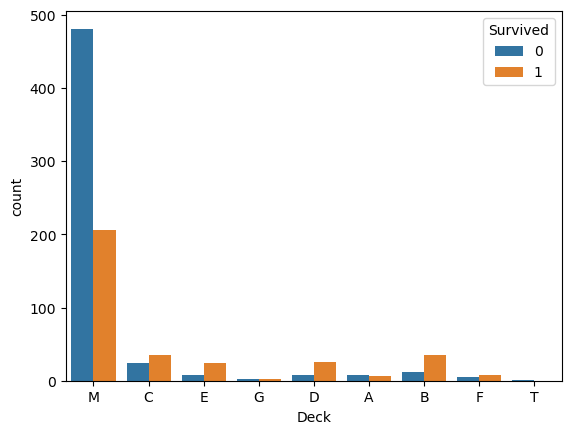

In [56]:
# Deck의 데이터에 따른 생존 사망 바 그래프를 그려보기
# countplot : 범주형 데이터의 빈도수를 차트바로 표시
# hue 컬럼을 기준으로 색상을 구분
sns.countplot(data=train, x='Deck', hue='Survived')
plt.show()

- M에서 상대적으로 사람이 많이 사망 → 생존여부 판단에 활용해도 괜찮겠다.

#### 2) Pclass 시각화

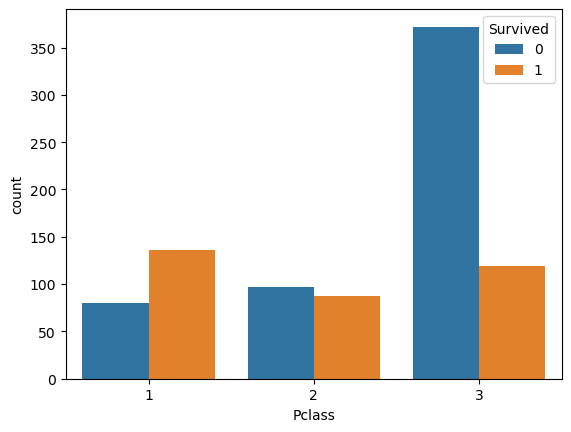

In [57]:
# Pclass에 따른 생존 여부 빈도수를 차트바로 시각화
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.show()

- 3등급 사람들이 상대적으로 많이 사망 → 생존여부 판단에 활용해도 괜찮겠다.

#### 3) Deck과 Pclass 시각화

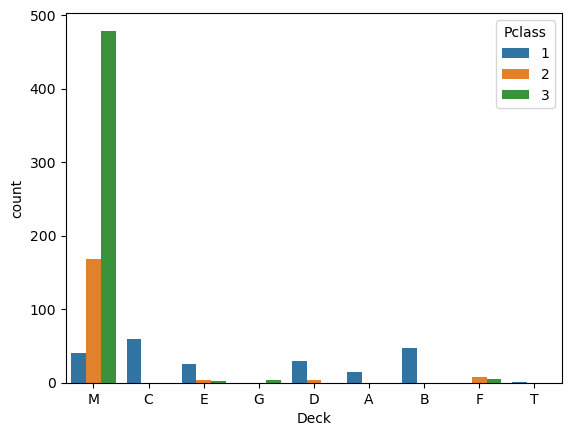

In [58]:
sns.countplot(data=train, x='Deck',hue='Pclass')
plt.show()

#### 4) Sex 시각화

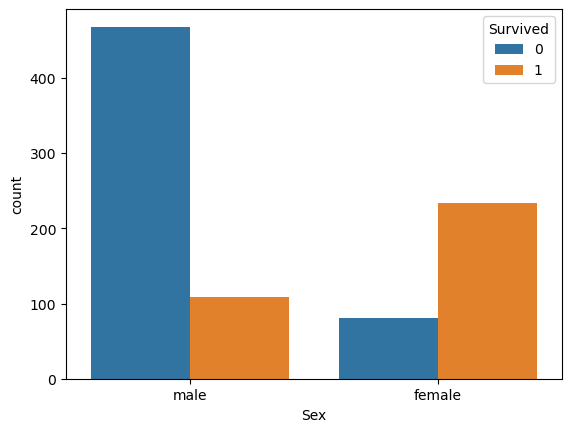

In [59]:
# 성별에 따른 생존 빈도를 바차트로 시각화
sns.countplot(data=train, x='Sex',hue='Survived')
plt.show()

#### 5) Embarked 시각화

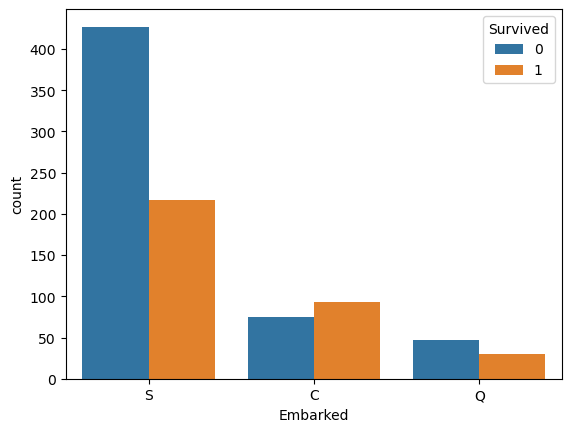

In [60]:
# 승선항에 따른 생존 빈도를 바차트로 시각화
sns.countplot(data=train, x='Embarked',hue='Survived')
plt.show()

#### 2. 수치형 데이터 탐색

#### 1) Age 시각화

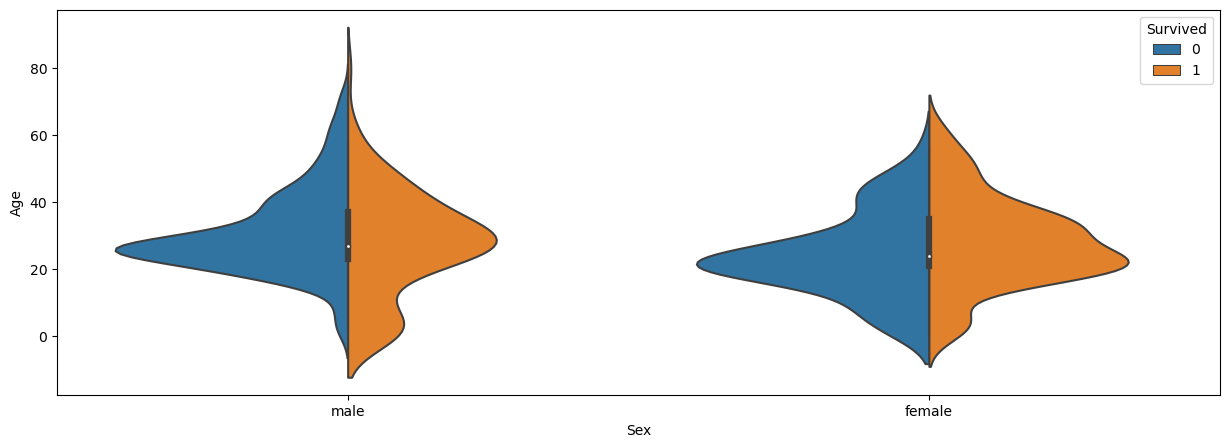

In [61]:
# 나이와 성별에 따른 생존여부 violinplot 그래프로 시각화
plt.figure(figsize=(15,5))
sns.violinplot(data=train, x='Sex', y='Age', hue='Survived', split=True)
#plt.ylim(0,80)
plt.show()

- 20~40대 사이가 사망률이 가장 높음
- 어린아이 중에서는 남아가 여아에 비해 많이 생존

#### 2) Fare 시각화

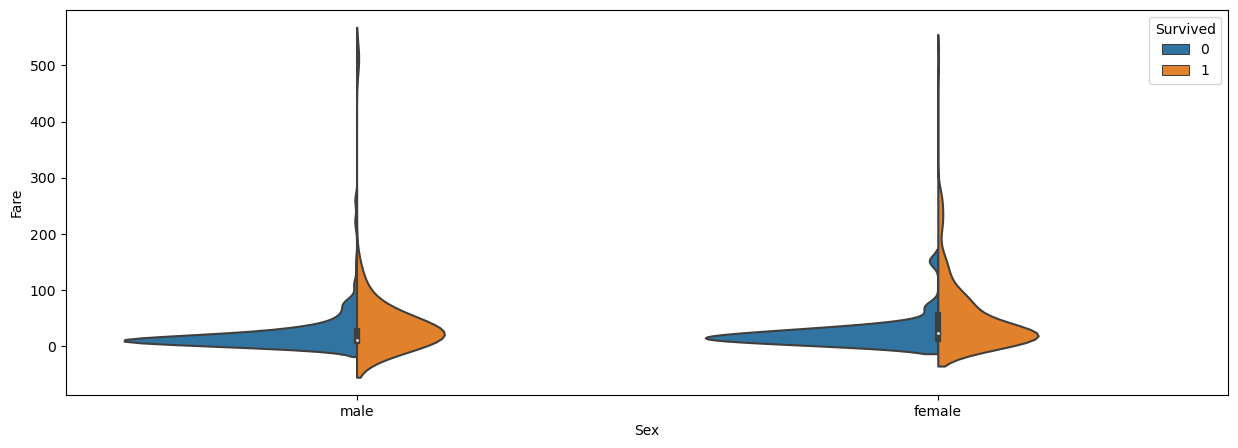

In [62]:
# 요금과 성별에 따른 생존여부 violinplot 그래프로 시각화
plt.figure(figsize=(15,5))
sns.violinplot(data=train, x='Sex', y='Fare', hue='Survived', split=True)
plt.show()

- 요금이 낮으면 상대적으로 생존율이 낮음

#### 3) Parch,SibSp (부모자식, 형제배우자)  시각화
- 특성공학 : Parch와 SibSp를 더해서 가족의 숫자라는 새로운 컬럼 생성

In [63]:
# Family_Size라는 새로운 컬럼 생성
# Parch와 SibSp를 더한 값을 Family_Size에 담기
train['Family_Size'] = train['Parch'] + train['SibSp'] + 1 # 본인숫자까지 더해줌
test['Family_Size'] = test['Parch'] + test['SibSp'] + 1

In [64]:
train
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Family_Size
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q,M,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S,M,2
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q,M,1
895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S,M,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S,M,3
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,26,0,0,A.5. 3236,8.0500,S,M,1
1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C,C,1
1307,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,S,M,1


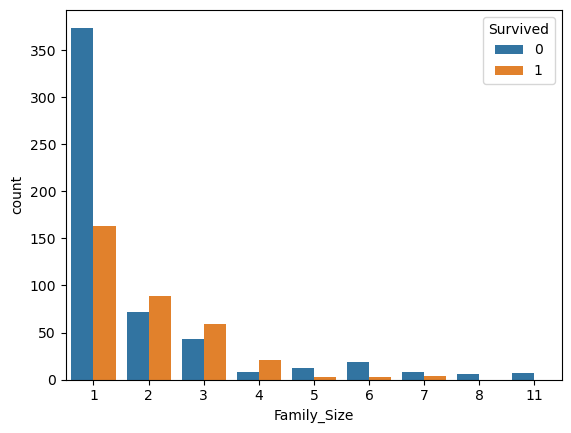

In [65]:
# Family_size 생존빈도 컬럼 시각화
sns.countplot(data=train, x='Family_Size', hue='Survived')
plt.show()

- 1인일 때 사망비율 높고, 2~4인 생존비율 높고, 5인 이상인 경우 사망비율 높음
- binning (사소한 관찰오류의 영향을 줄여줄 수 있다)

- Family_Group 컬럼 :  Family_Size - 1 : Alone , 2~4 :Small, 5: Large

In [66]:
# 카테고리화 함수 pd.cut
bins = [0,1,4,11] # 범위 지정 : 0초과1이하, 1초과4이하, 4초과 11이하
labels=['Alone', 'Small', 'Large'] # 라벨지정

# Family_Group 컬럼 생성하여 카테고리 담아주기
train['Family_Group']= pd.cut(train['Family_Size'], bins=bins, labels=labels)
test['Family_Group']= pd.cut(test['Family_Size'], bins=bins, labels=labels)

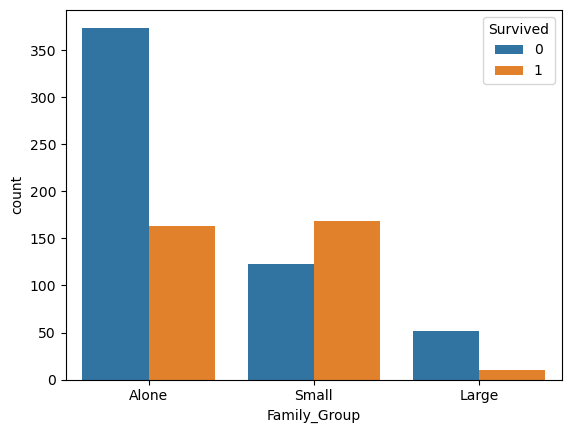

In [67]:
# Family_Group에 따른 생존 빈도수 시각화
sns.countplot(data=train, x='Family_Group', hue='Survived')
plt.show()

#### 3. Text 데이터 탐색

#### 1) Name 데이터
- 중간 호칭만 추출하자

In [68]:
train['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [69]:
train['Name'][1].split()

['Braund,', 'Mr.', 'Owen', 'Harris']

In [70]:
# 해당 데이터에서 'Mr' 호칭만 추출하기
train['Name'][1].split(',')[1].split('.')[0].strip()

'Mr'

In [71]:
# 중간 호칭을 추출해주는 함수 정의
def split_title(row):
    """이름의 중간 호칭을 리턴"""   
    return row.split(',')[1].split('.')[0].strip()

In [72]:
# apply 메서드 활용하기
# 시리즈 자료형이기 때문에 axis 축 설정 X
# 'Title' 새로운 컬럼 생성하여 값 대입
train['Title'] = train['Name'].apply(split_title)
test['Title'] = test['Name'].apply(split_title)

In [73]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

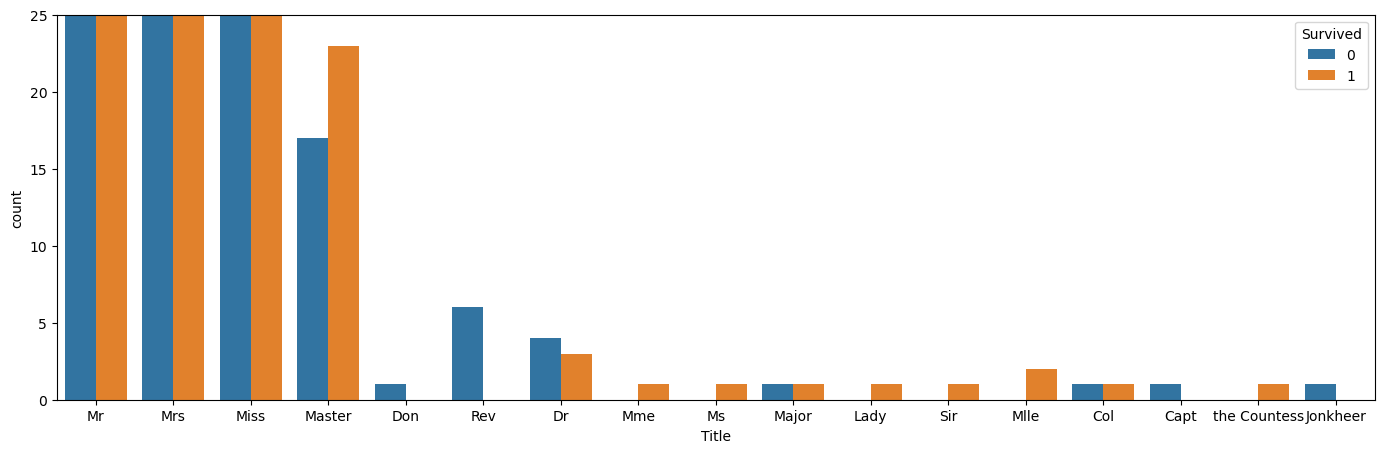

In [74]:
# 중간 호칭별로 생존 빈도수를 막대그래프로 시각화
plt.figure(figsize=(17,5))
sns.countplot(data=train, x='Title', hue='Survived')
plt.ylim(0,25)
plt.show()

- Master : 결혼하지 않은 남성. 주로 청소년 이하
- Rev : 목사 (6명 모두 사망)
- Mr,Mrs, Miss, Master, Rev, Other(나머지)

In [75]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [76]:
title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Don', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer']

In [77]:
len(title)

17

In [78]:
conver_title=['Mr', 'Mrs', 'Miss', 'Master', 'Rev'] + ['Other'] * 12
conver_title

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Rev',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other']

In [79]:
# 두개의 리스트 딕셔너리 형태로 - zip()
title_dict = dict(zip(title,conver_title))
title_dict

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Don': 'Other',
 'Dr': 'Other',
 'Mme': 'Other',
 'Ms': 'Other',
 'Major': 'Other',
 'Lady': 'Other',
 'Sir': 'Other',
 'Mlle': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other'}

In [80]:
train['Title'] = train['Title'].map(title_dict)
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [81]:
test['Title'].map(title_dict).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev', nan], dtype=object)

In [82]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [83]:
# 딕셔너리에서 key에는 'Dona'라는 값 value에는 'Other' 값 추가
title_dict['Dona']='Other'
title_dict

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Don': 'Other',
 'Dr': 'Other',
 'Mme': 'Other',
 'Ms': 'Other',
 'Major': 'Other',
 'Lady': 'Other',
 'Sir': 'Other',
 'Mlle': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other',
 'Dona': 'Other'}

In [84]:
test['Title'] = test['Title'].map(title_dict)
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [85]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [86]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [87]:
# Name 컬럼 삭제하기
# drop메서드
train.drop(['Name'], axis=1, inplace=True)
test.drop(['Name'], axis=1, inplace=True)

In [88]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Family_Size,Family_Group,Title
PassengerId,,,,,,,,,,,,,
1,0,3,male,22,1,0,A/5 21171,7.2500,S,M,2,Small,Mr
2,1,1,female,38,1,0,PC 17599,71.2833,C,C,2,Small,Mrs
3,1,3,female,26,0,0,STON/O2. 3101282,7.9250,S,M,1,Alone,Miss
4,1,1,female,35,1,0,113803,53.1000,S,C,2,Small,Mrs
5,0,3,male,35,0,0,373450,8.0500,S,M,1,Alone,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27,0,0,211536,13.0000,S,M,1,Alone,Rev
888,1,1,female,19,0,0,112053,30.0000,S,B,1,Alone,Miss
889,0,3,female,21,1,2,W./C. 6607,23.4500,S,M,4,Small,Miss


In [89]:
test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Family_Size,Family_Group,Title
PassengerId,,,,,,,,,,,,
892,3,male,34,0,0,330911,7.8292,Q,M,1,Alone,Mr
893,3,female,47,1,0,363272,7.0000,S,M,2,Small,Mrs
894,2,male,62,0,0,240276,9.6875,Q,M,1,Alone,Mr
895,3,male,27,0,0,315154,8.6625,S,M,1,Alone,Mr
896,3,female,22,1,1,3101298,12.2875,S,M,3,Small,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,male,26,0,0,A.5. 3236,8.0500,S,M,1,Alone,Mr
1306,1,female,39,0,0,PC 17758,108.9000,C,C,1,Alone,Other
1307,3,male,38,0,0,SOTON/O.Q. 3101262,7.2500,S,M,1,Alone,Mr


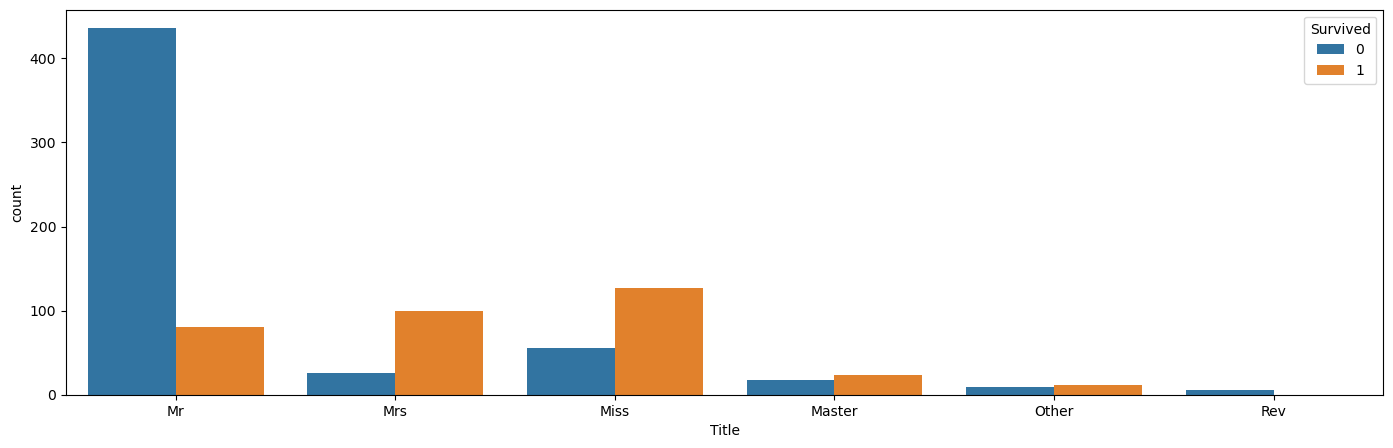

In [90]:
# 중간 호칭별로 생존 빈도수를 막대그래프로 시각화
plt.figure(figsize=(17,5))
sns.countplot(data=train, x='Title', hue='Survived')
plt.show()

#### 2) Ticket 데이터
- 분석하기에 의미있는 데이터로 보기 어려움
- 컬럼 삭제

In [91]:
train['Ticket'].head()

PassengerId
1           A/5 21171
2            PC 17599
3    STON/O2. 3101282
4              113803
5              373450
Name: Ticket, dtype: object

In [92]:
train.drop(['Ticket'], axis=1, inplace=True)
test.drop(['Ticket'], axis=1, inplace=True)

In [1]:
train.info()

NameError: name 'train' is not defined

In [ ]:
test.info()

### 범주형 데이터 인코딩

In [95]:
# X_train(훈련용 문제) / y_train(훈련용 답) / X_test(테스트용 문제)
X_train = train.drop(['Survived'], axis=1)
y_train = train['Survived']
X_test = test

In [96]:
# X_train 원핫인코딩 진행하기
# get_dummies() 메서드 활용
X_train = pd.get_dummies(X_train)
X_train

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22,1,0,7.2500,2,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,38,1,0,71.2833,2,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,3,26,0,0,7.9250,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,35,1,0,53.1000,2,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5,3,35,0,0,8.0500,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27,0,0,13.0000,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
888,1,19,0,0,30.0000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
889,3,21,1,2,23.4500,4,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [97]:
X_test = pd.get_dummies(X_test)
X_test

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_M,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,34,0,0,7.8292,1,0,1,0,1,...,1,1,0,0,0,0,1,0,0,0
893,3,47,1,0,7.0000,2,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
894,2,62,0,0,9.6875,1,0,1,0,1,...,1,1,0,0,0,0,1,0,0,0
895,3,27,0,0,8.6625,1,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
896,3,22,1,1,12.2875,3,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,26,0,0,8.0500,1,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
1306,1,39,0,0,108.9000,1,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1307,3,38,0,0,7.2500,1,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0


In [98]:
print(X_train.shape)
print(X_test.shape)

(891, 29)
(418, 28)


In [99]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M',
       'Deck_T', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

In [100]:
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M',
       'Family_Group_Alone', 'Family_Group_Small', 'Family_Group_Large',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other',
       'Title_Rev'],
      dtype='object')

In [101]:
# 컬럼의 차이를 확인하는 방법
# 집합함수 set() - 차집합

set(X_train.columns)-set(X_test.columns)

{'Deck_T'}

In [102]:
# test에 'Deck_T' 추가
X_test['Deck_T'] = 0

In [103]:
set(X_train.columns)-set(X_test.columns)

set()

In [104]:
print(X_train.shape)
print(X_test.shape)

(891, 29)
(418, 29)


In [105]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M',
       'Deck_T', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

In [106]:
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M',
       'Family_Group_Alone', 'Family_Group_Small', 'Family_Group_Large',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other',
       'Title_Rev', 'Deck_T'],
      dtype='object')

### 컬럼 순서 맞추기

In [107]:
X_test = X_test[X_train.columns]

In [108]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M',
       'Deck_T', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

In [109]:
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M',
       'Deck_T', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

### 4. 모델 선택 및 학습

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#### 1) DecisionTree 모델

In [111]:
# 모델 생성
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model

DecisionTreeClassifier(max_depth=3)

In [112]:
# 교차 검증
result = cross_val_score(tree_model,
                X_train,
                y_train,
                cv = 5)
result

array([0.82681564, 0.79213483, 0.8258427 , 0.78651685, 0.84831461])

In [113]:
print('평균 : ',result.mean())
print('표준편차 : ',result.std())

평균 :  0.8159249262444291
표준편차 :  0.02322440353885469


In [114]:
# 모델 학습
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [115]:
# 예측
pre = tree_model.predict(X_test)
pre

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [116]:
#답안지 불러오기
res = pd.read_csv('gender_submission.csv')
# 답안지에 예측 값 넣기
res['Survived'] = pre
# csv 파일로 변환해서 캐글 사이트에서 정확도 검증
res.to_csv('tree_model.csv', index=False)

#### 2) KNN 모델

In [117]:
# 모델 생성
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model

KNeighborsClassifier()

In [118]:
# 교차 검증
result = cross_val_score(knn_model,
                X_train,
                y_train,
                cv = 5)
result

array([0.69832402, 0.71348315, 0.71910112, 0.76966292, 0.74157303])

In [119]:
print('평균 : ', result.mean())
print('표준편차 : ', result.std())

평균 :  0.7284288494130939
표준편차 :  0.024858396566457854


In [120]:
# 모델 학습
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [121]:
# 예측
pre=knn_model.predict(X_test)
pre

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [122]:
#답안지 불러오기
res = pd.read_csv('gender_submission.csv')
# 답안지에 예측 값 넣기
res['Survived'] = pre
# csv 파일로 변환해서 캐글 사이트에서 정확도 검증
res.to_csv('knn_model.csv', index=False)

- knn 모델 성능이 너무 낮게 나와 Feature Scaling 적용

#### 3) 피처 스케일링 Feature Scaling
- 특성마다 다른 범위를 가지는 경우 머신러닝 모델들이 제대로 학습되지 않을 가능성이 있음
- 범위가 다른 것을 맞춰주면서 머신러닝 성능을 높여주는 것 / 약 6개쯤 있음
- min-maxscaler = min-max normalization : 최솟값과 최대값을 이용해 데이터 값을 0과 1 사이의 범위 값으로 변환
- standard scaler = standardization = 표준화 : 평균 = 0, 표준편차 = 1

3-1) min-max scaler 적용하기

In [123]:
from sklearn.preprocessing import MinMaxScaler

In [124]:
mm_scaler = MinMaxScaler()

In [125]:
mm_scaler.fit(X_train)

MinMaxScaler()

In [126]:
mm_transform_X_train = mm_scaler.transform(X_train)
mm_transform_X_train

array([[1.    , 0.275 , 0.125 , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.475 , 0.125 , ..., 1.    , 0.    , 0.    ],
       [1.    , 0.325 , 0.    , ..., 0.    , 0.    , 0.    ],
       ...,
       [1.    , 0.2625, 0.125 , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.325 , 0.    , ..., 0.    , 0.    , 0.    ],
       [1.    , 0.4   , 0.    , ..., 0.    , 0.    , 0.    ]])

In [127]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M',
       'Deck_T', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

In [128]:
mm_transform_X_train = pd.DataFrame(mm_transform_X_train, columns=X_train.columns)
mm_transform_X_train

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
0,1.0,0.2750,0.125,0.000000,0.014151,0.1,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.4750,0.125,0.000000,0.139136,0.1,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.3250,0.000,0.000000,0.015469,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.4375,0.125,0.000000,0.103644,0.1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.4375,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.5,0.3375,0.000,0.000000,0.025374,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,0.0,0.2375,0.000,0.000000,0.058556,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
888,1.0,0.2625,0.125,0.333333,0.045771,0.3,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
889,0.0,0.3250,0.000,0.000000,0.058556,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [129]:
mm_transform_X_train.describe()

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.364899,0.065376,0.063599,0.062858,0.090460,0.352413,0.647587,0.188552,0.086420,...,0.001122,0.602694,0.327722,0.069585,0.044893,0.204265,0.580247,0.140292,0.023569,0.006734
std,0.418036,0.166420,0.137843,0.134343,0.096995,0.161346,0.477990,0.477990,0.391372,0.281141,...,0.033501,0.489615,0.469646,0.254589,0.207186,0.403390,0.493796,0.347485,0.151787,0.081830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.262500,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.325000,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.450000,0.125000,0.000000,0.060508,0.100000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
# X_test에 min_max scaler 적용
mm_transform_X_test = mm_scaler.transform(X_test)
# 데이터 프레임 변환
mm_transform_X_test = pd.DataFrame(mm_transform_X_test, columns=X_test.columns)

mm_transform_X_test.describe()

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,...,418.0,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.632775,0.367972,0.055921,0.065391,0.069432,0.083971,0.363636,0.636364,0.244019,0.110048,...,0.0,0.605263,0.346890,0.047847,0.050239,0.186603,0.574163,0.172249,0.011962,0.004785
std,0.420919,0.162094,0.112095,0.163571,0.109015,0.151907,0.481622,0.481622,0.430019,0.313324,...,0.0,0.489380,0.476551,0.213698,0.218700,0.390059,0.495062,0.378049,0.108844,0.069088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.262500,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.325000,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.450000,0.125000,0.000000,0.061429,0.100000,1.000000,1.000000,0.000000,0.000000,...,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,0.950000,1.000000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
# 교차검증
# cross_val_score
result = cross_val_score(knn_model,
                mm_transform_X_train,
                y_train,
                cv = 5)
result

array([0.79888268, 0.78651685, 0.83146067, 0.76404494, 0.84831461])

In [132]:
print('평균 : ', result.mean())
print('표준편차 : ', result.std())

평균 :  0.8058439520431863
표준편차 :  0.0304273760250946


In [133]:
# 모델 학습
knn_model.fit(mm_transform_X_train,y_train)
# 예측
pre=knn_model.predict(mm_transform_X_test)

In [134]:
#답안지 불러오기
res = pd.read_csv('gender_submission.csv')
# 답안지에 예측 값 넣기
res['Survived'] = pre
# csv 파일로 변환해서 캐글 사이트에서 정확도 검증
res.to_csv('mm_knn_model.csv', index=False) # 정확도 0.77272

3-2) standard scaler 적용하기

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
st_scaler = StandardScaler()

In [137]:
st_scaler.fit(X_train)

StandardScaler()

In [138]:
st_transform_X_train = st_scaler.transform(X_train)
st_transform_X_train

array([[ 0.82737724, -0.5404969 ,  0.43279337, ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       [-1.56610693,  0.66195688,  0.43279337, ...,  2.47547975,
        -0.15536387, -0.0823387 ],
       [ 0.82737724, -0.23988346, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       ...,
       [ 0.82737724, -0.61565027,  0.43279337, ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       [-1.56610693, -0.23988346, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       [ 0.82737724,  0.21103671, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ]])

In [139]:
st_transform_X_train = pd.DataFrame(st_transform_X_train, columns=X_train.columns)
st_transform_X_train

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
0,0.827377,-0.540497,0.432793,-0.473674,-0.502445,0.059160,-0.737695,0.737695,-0.482043,-0.307562,...,-0.03352,-1.231645,1.432260,-0.273476,-0.216803,-0.506655,0.850532,-0.403962,-0.155364,-0.082339
1,-1.566107,0.661957,0.432793,-0.473674,0.786845,0.059160,1.355574,-1.355574,2.074505,-0.307562,...,-0.03352,-1.231645,1.432260,-0.273476,-0.216803,-0.506655,-1.175735,2.475480,-0.155364,-0.082339
2,0.827377,-0.239883,-0.474545,-0.473674,-0.488854,-0.560975,1.355574,-1.355574,-0.482043,-0.307562,...,-0.03352,0.811922,-0.698197,-0.273476,-0.216803,1.973729,-1.175735,-0.403962,-0.155364,-0.082339
3,-1.566107,0.436497,0.432793,-0.473674,0.420730,0.059160,1.355574,-1.355574,-0.482043,-0.307562,...,-0.03352,-1.231645,1.432260,-0.273476,-0.216803,-0.506655,-1.175735,2.475480,-0.155364,-0.082339
4,0.827377,0.436497,-0.474545,-0.473674,-0.486337,-0.560975,-0.737695,0.737695,-0.482043,-0.307562,...,-0.03352,0.811922,-0.698197,-0.273476,-0.216803,-0.506655,0.850532,-0.403962,-0.155364,-0.082339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.164730,-0.474545,-0.473674,-0.386671,-0.560975,-0.737695,0.737695,-0.482043,-0.307562,...,-0.03352,0.811922,-0.698197,-0.273476,-0.216803,-0.506655,-1.175735,-0.403962,-0.155364,12.144958
887,-1.566107,-0.765957,-0.474545,-0.473674,-0.044381,-0.560975,1.355574,-1.355574,-0.482043,-0.307562,...,-0.03352,0.811922,-0.698197,-0.273476,-0.216803,1.973729,-1.175735,-0.403962,-0.155364,-0.082339
888,0.827377,-0.615650,0.432793,2.008933,-0.176263,1.299429,1.355574,-1.355574,-0.482043,-0.307562,...,-0.03352,-1.231645,1.432260,-0.273476,-0.216803,1.973729,-1.175735,-0.403962,-0.155364,-0.082339
889,-1.566107,-0.239883,-0.474545,-0.473674,-0.044381,-0.560975,-0.737695,0.737695,2.074505,-0.307562,...,-0.03352,0.811922,-0.698197,-0.273476,-0.216803,-0.506655,0.850532,-0.403962,-0.155364,-0.082339


In [140]:
# X_test에 standard scaler 적용 표준화
st_transform_X_test = st_scaler.transform(X_test)
# 데이터 프레임 변환
st_transform_X_test = pd.DataFrame(st_transform_X_test, columns=X_test.columns)

st_transform_X_test.describe()

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,...,4.180000e+02,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,-0.051570,0.018479,-0.068631,0.013345,0.067814,-0.040240,0.023493,-0.023493,0.141804,0.084091,...,-3.352008e-02,0.005251,0.040837,-0.085432,0.025817,-0.043809,-0.012328,0.092018,-0.076514,-0.023835
std,1.007462,0.974550,0.813665,1.218251,1.124558,0.942029,1.008165,1.008165,1.099364,1.115101,...,2.431523e-16,1.000081,1.015271,0.839856,1.056165,0.967497,1.003127,1.088570,0.717484,0.844765
min,-1.566107,-2.193871,-0.474545,-0.473674,-0.648422,-0.560975,-0.737695,-1.355574,-0.482043,-0.307562,...,-3.352008e-02,-1.231645,-0.698197,-0.273476,-0.216803,-0.506655,-1.175735,-0.403962,-0.155364,-0.082339
25%,-1.566107,-0.615650,-0.474545,-0.473674,-0.489442,-0.560975,-0.737695,-1.355574,-0.482043,-0.307562,...,-3.352008e-02,-1.231645,-0.698197,-0.273476,-0.216803,-0.506655,-1.175735,-0.403962,-0.155364,-0.082339
50%,0.827377,-0.239883,-0.474545,-0.473674,-0.357391,-0.560975,-0.737695,0.737695,-0.482043,-0.307562,...,-3.352008e-02,0.811922,-0.698197,-0.273476,-0.216803,-0.506655,0.850532,-0.403962,-0.155364,-0.082339
75%,0.827377,0.511650,0.432793,-0.473674,-0.014745,0.059160,1.355574,0.737695,-0.482043,-0.307562,...,-3.352008e-02,0.811922,1.432260,-0.273476,-0.216803,-0.506655,0.850532,-0.403962,-0.155364,-0.082339
max,0.827377,3.517785,6.784163,10.698058,9.667167,5.640372,1.355574,0.737695,2.074505,3.251373,...,-3.352008e-02,0.811922,1.432260,3.656633,4.612483,1.973729,0.850532,2.475480,6.436503,12.144958


In [141]:
# 교차검증
# cross_val_score
result = cross_val_score(knn_model,
                st_transform_X_train,
                y_train,
                cv = 5)
result

array([0.82681564, 0.7752809 , 0.80898876, 0.76966292, 0.83707865])

In [142]:
print('평균 : ', result.mean())
print('표준편차 : ', result.std())

평균 :  0.8035653756826313
표준편차 :  0.026990797516889608


In [143]:
# 모델 학습
knn_model.fit(st_transform_X_train,y_train)
# 예측
pre=knn_model.predict(st_transform_X_test)

In [144]:
#답안지 불러오기
res = pd.read_csv('gender_submission.csv')
# 답안지에 예측 값 넣기
res['Survived'] = pre
# csv 파일로 변환해서 캐글 사이트에서 정확도 검증
res.to_csv('st_knn_model.csv', index=False) # 정확도 0.7488

#### 4) 앙상블(Ensenble)
- 여러개의 모델을 연결하여 더 좋은 성능을 만드는 기법
- <b>보팅(Voting)</b> : 여러개의 다른 종류의 모델이 예측한 결과를 다수결(Hard Voting) 혹은 평균(Soft Voting)을 통해 최종 선정
    - 소프트가 일반적
- <b>베깅(Begging)</b> : 여러개의 같은 종류의 모델이 예측한 결과를 다수결 혹은 평균을 통해 최종 선정
    - 데이터 샘플링을 서로 다르게 가져가면서 중첩되게 데이터를 분리하는 방식(Bootstrapping 방식) 
    - ex) random forest (다수결) : 여러 개의 결정 트리로 소프트 보팅을 통해 예측을 수행
- <b>부스팅(Boosting)</b> : 여러 개의 같은 종류의 모델이 순차적으로 학습-예측하면서 오류를 개선하는 방식
    -  일부러 성능이 안 좋은 모델들 사용, 합쳐서 성능 극대화
    - ex) AdaBoost, GradientBoosting, XGBoost
    - 스텀프(Stump) : 나무의 그루터기// 루트 하나, 분류 노드 2개 (max_depth =1)

In [145]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

##### 4-1) Bagging
- 같은 알고리즘으로 여러 개의 모델을 만들어서 투표를 통해 최종 예측, 결과를 결정하는 방식
- 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행 -> BootStrapping 방식
- 랜덤포레스트 학습 진행

In [146]:
# 랜덤포레스트 모델 생성
rf_model = RandomForestClassifier(n_estimators = 1000, # 결정트리의 개수
                                  max_depth = 5,        # 트리의 최대 깊이
                                  min_samples_leaf = 15, # 리프노드가 되기 위한 최소한의 샘플 데이터 수
                                  max_leaf_nodes = 50     # 리프노드의 최대 개수
                      ) 

In [147]:
# 교차검증 확인
result = cross_val_score(rf_model,
                X_train,
                y_train,
                cv = 5)
result

array([0.83798883, 0.82022472, 0.8258427 , 0.78089888, 0.8258427 ])

In [148]:
print('평균 : ', result.mean())
print('표준편차 : ', result.std())

평균 :  0.8181595631159375
표준편차 :  0.019513505187380095


In [149]:
# 학습
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, min_samples_leaf=15,
                       n_estimators=1000)

In [150]:
# 예측
pre = rf_model.predict(X_test)

In [151]:
# 정답 제출
# 답안지 불러오기
res = pd.read_csv('gender_submission.csv')
# 답안지에 예측 값 넣기
res['Survived'] = pre
# csv 파일로 변환해서 캐글 사이트에서 정확도 검증
res.to_csv('rf_model.csv', index=False) #0.7799

##### 4-2) Voting
- 서로 다른 모델을 결합하여 투표를 통해 최종 예측 결과를 결정하는 방식

In [152]:
# 모델 생성
knn_model = KNeighborsClassifier(n_neighbors=5)
tree_model = DecisionTreeClassifier(max_depth=5)
forest_model = RandomForestClassifier(n_estimators = 1000, max_depth = 5, min_samples_leaf = 15, max_leaf_nodes = 50)

In [153]:
voting_model = VotingClassifier(
                       estimators = [('knn',knn_model),
                                     ('tree',tree_model),
                                     ('forest',forest_model)],
                       voting = 'soft'
                      ) 

In [154]:
# 교차검증 확인
result = cross_val_score(voting_model,
                         X_train,
                         y_train,
                         cv = 5)
result

array([0.79888268, 0.79213483, 0.82022472, 0.78651685, 0.84831461])

In [155]:
print('평균 : ', result.mean())
print('표준편차 : ', result.std())

평균 :  0.8092147385600402
표준편차 :  0.02264370975868085


In [156]:
# 학습
voting_model.fit(X_train, y_train)
# 예측
pre = voting_model.predict(X_test)

In [157]:
# 정답제출
# 답안지 불러오기
res = pd.read_csv('gender_submission.csv')
# 답안지에 예측 값 넣기
res['Survived'] = pre
# csv 파일로 변환해서 캐글 사이트에서 정확도 검증
res.to_csv('voting_model.csv', index=False) #0.75598

##### 4-3) Boosting
- 성능이 안 좋은 약한 학습자(weak learner)들을 합쳐서 성능을 극대화
- AdaBoost(에(이)다부스트) : 스텀프 -> 데이터 무작위 선택(오차데이터에 가중치 적용) -> 반복 -> 성능 합으로 예측

In [158]:
# AdaBoost 모델 생성
ada_model = AdaBoostClassifier(n_estimators=100) # 결정트리의 개수

In [159]:
# 교차검증
result = cross_val_score(ada_model,
                         X_train,
                         y_train,
                         cv = 5)
result

array([0.77653631, 0.79775281, 0.80898876, 0.8258427 , 0.8258427 ])

In [160]:
print('평균 : ', result.mean())
print('표준편차 : ', result.std())

평균 :  0.8069926558282594
표준편차 :  0.01858814741541357


In [161]:
# 학습
ada_model.fit(X_train, y_train)
# 예측
pre = ada_model.predict(X_test)

In [162]:
# 정답제출
# 답안지 불러오기
res = pd.read_csv('gender_submission.csv')
# 답안지에 예측 값 넣기
res['Survived'] = pre
# csv 파일로 변환해서 캐글 사이트에서 정확도 검증
res.to_csv('ada_model.csv', index=False) 

#### 5) 그리드 서치 (GridSearch)
- 최적의 하이퍼파라미터를 찾는 기법


In [163]:
from sklearn.model_selection import GridSearchCV 

In [164]:
param_grid = {
    'max_depth' : [5,10,15,20],
    'n_estimators' : [1000,1500,2000,2500],
    'min_samples_leaf' : [10,30,50],
    'max_leaf_nodes' : [20,50,80] 
}

In [165]:
grid = GridSearchCV(rf_model,
             param_grid,
             cv = 3)
grid

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=5, max_leaf_nodes=50,
                                              min_samples_leaf=15,
                                              n_estimators=1000),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_leaf_nodes': [20, 50, 80],
                         'min_samples_leaf': [10, 30, 50],
                         'n_estimators': [1000, 1500, 2000, 2500]})

In [166]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=5, max_leaf_nodes=50,
                                              min_samples_leaf=15,
                                              n_estimators=1000),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_leaf_nodes': [20, 50, 80],
                         'min_samples_leaf': [10, 30, 50],
                         'n_estimators': [1000, 1500, 2000, 2500]})

In [172]:
# best_score 메서드
# best_params 메서드
print(grid.best_score_)
print(grid.best_params_)
"""
0.8282828282828283
{'max_depth': 15, 'max_leaf_nodes': 80, 'min_samples_leaf': 10, 'n_estimators': 1500}
"""

0.8282828282828283
{'max_depth': 15, 'max_leaf_nodes': 80, 'min_samples_leaf': 10, 'n_estimators': 1500}


- best params에 맞춰서 모델 생성

In [174]:
# 모델 생성(하이퍼 파라미터)

final_rf_model = RandomForestClassifier(n_estimators = 1500,
                                        max_depth = 15,
                                        min_samples_leaf = 10,
                                        max_leaf_nodes = 80 
                                        ) 

In [179]:
# 교차검증 확인
result = cross_val_score(final_rf_model,
                         X_train,
                         y_train,
                         cv = 5)
print(result)
print('평균 : ', result.mean())
print('표준편차 : ', result.std())

[0.83798883 0.82022472 0.8258427  0.80337079 0.84831461]
평균 :  0.8271483271608814
표준편차 :  0.015365808034604774


In [181]:
# 학습
final_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_leaf_nodes=80, min_samples_leaf=10,
                       n_estimators=1500)

In [182]:
# 예측
pre = final_rf_model.predict(X_test)

In [183]:
# 정답제출
# 답안지 불러오기
res = pd.read_csv('gender_submission.csv')
# 답안지에 예측 값 넣기
res['Survived'] = pre
# csv 파일로 변환해서 캐글 사이트에서 정확도 검증
res.to_csv('final_rf_model.csv', index=False) 